# FIFA 18 game data analysis:


Data Contains:
Player personal attributes (Nationality, Club, Photo, Age, Value etc.)
Player performance attributes (Overall, Potential, Aggression, Agility etc.)
Player preferred position and ratings at all positions.

The data can be used to identify:
1 Best Midfilder 2 Best CF/ST 2 Best Defender 4 Best Team overall 5 Best team among any league 6 Top goalscorer overall 
7 age distribution in football overall 8 Ronaldo vs Messi 9 Football winner prediction

Possible Explorations
Make your dream team
Analyse which Club or National Team has the best-rated players
Assess the strength of a team at a particular position
Analyse the team with the best dribbling speed
Co-relate between Age and Overall rating
Co-relate between Age and Nationality
Co-relate between Age and Potential

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
df = pd.read_csv('CompleteDataset.csv', low_memory= False, index_col = 0)
df.head()
#columns like photo, Flag, Club Logo, can be dropped
#since the number of columns are too many better to work selecting a few columns at once


#df.info()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df2 = df.drop(['Photo', 'Club Logo', 'Flag'], axis = 1)

#finding the best team in fifa 18:
#let us go with 4-3-3 system: so 4 players at back, 3 at mid and 3 at front are needed




<AxesSubplot:xlabel='count', ylabel='Nationality'>

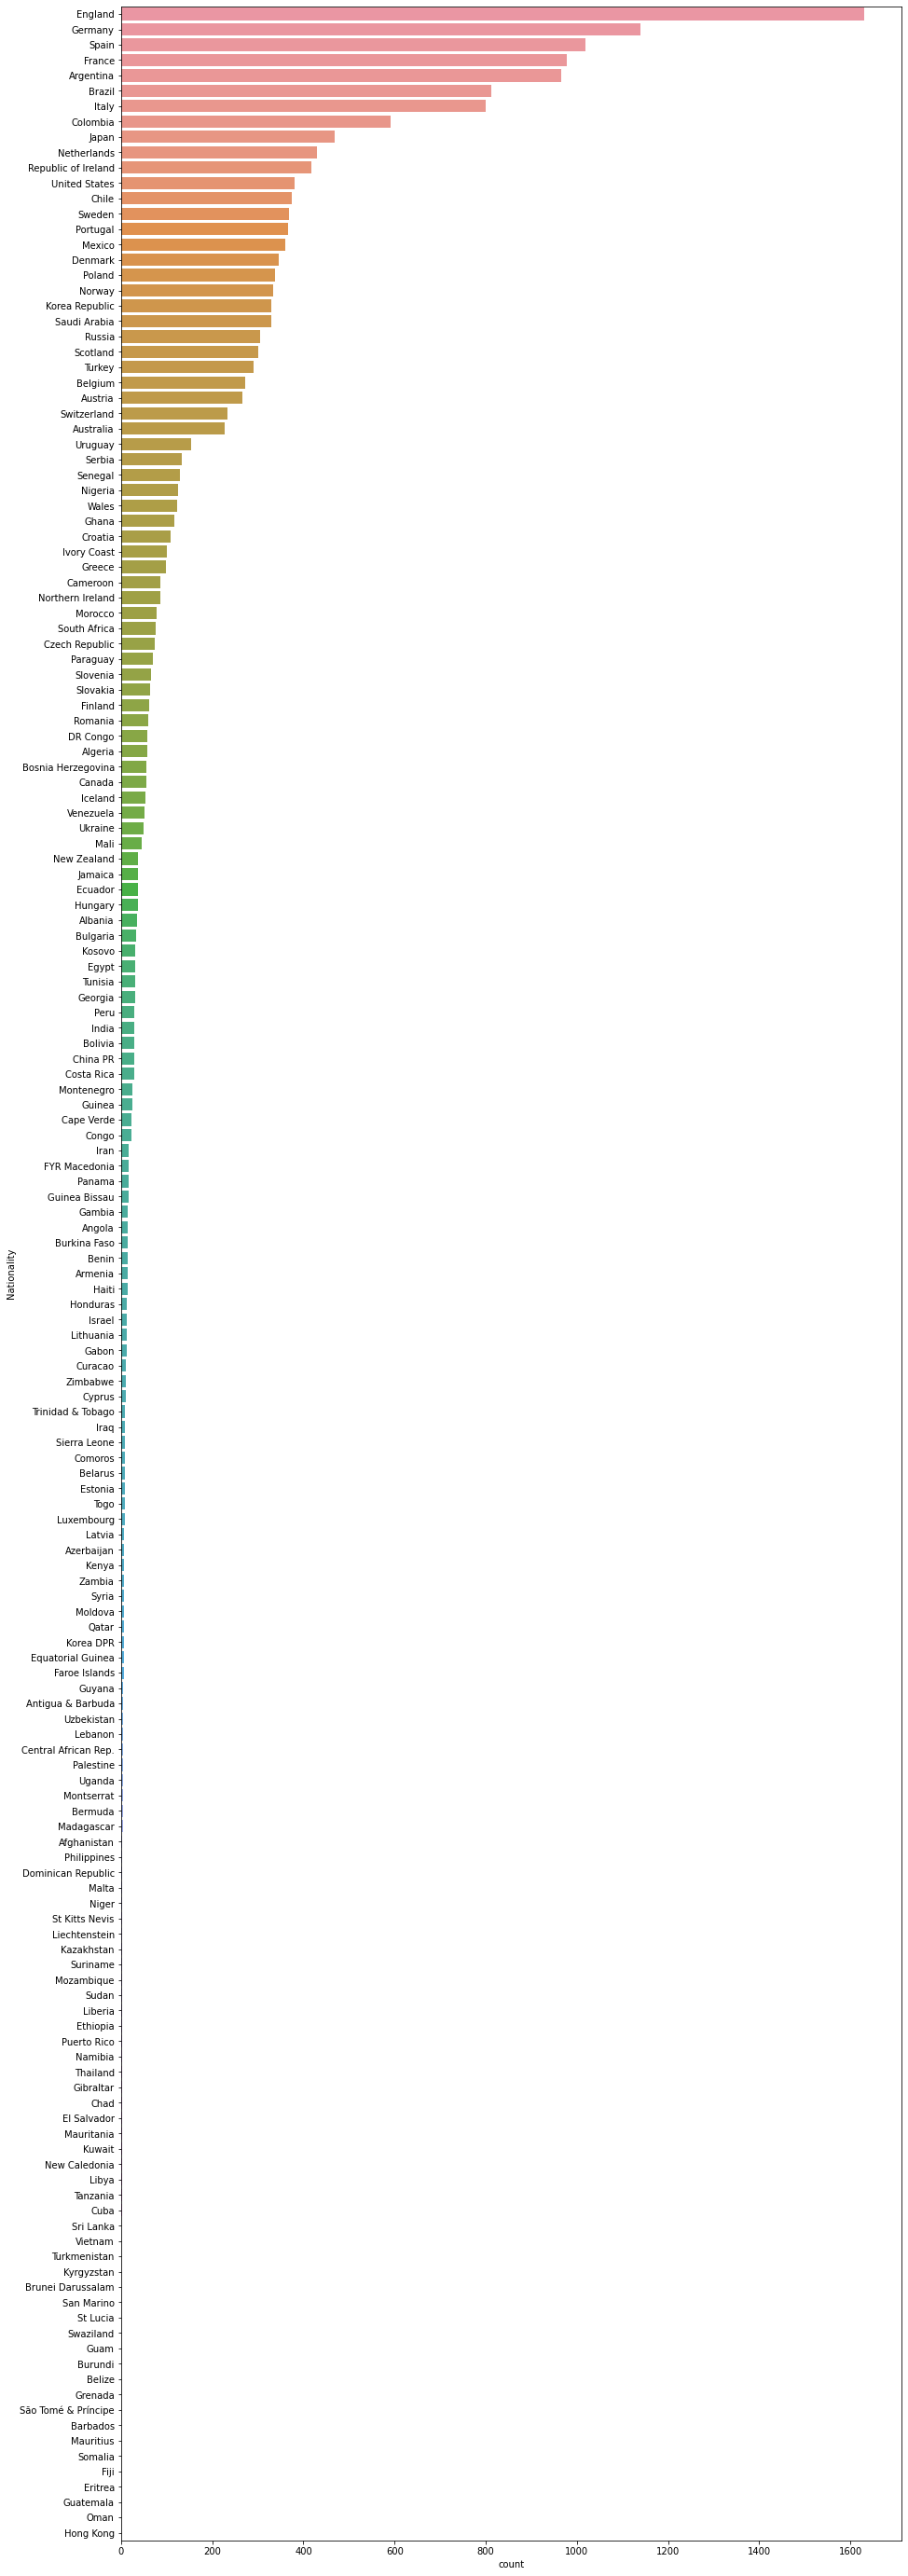

In [9]:
#who is the best goalkeeper:

plt.figure(figsize= (15,50))  #specifying the canvas sie helps in better view
sns.countplot(y= df2.Nationality, order = df2.Nationality.value_counts().index)

The most number of players are from England, followed by Germany. Also indicates the most number of players are from Europe 

<AxesSubplot:xlabel='Age', ylabel='count'>

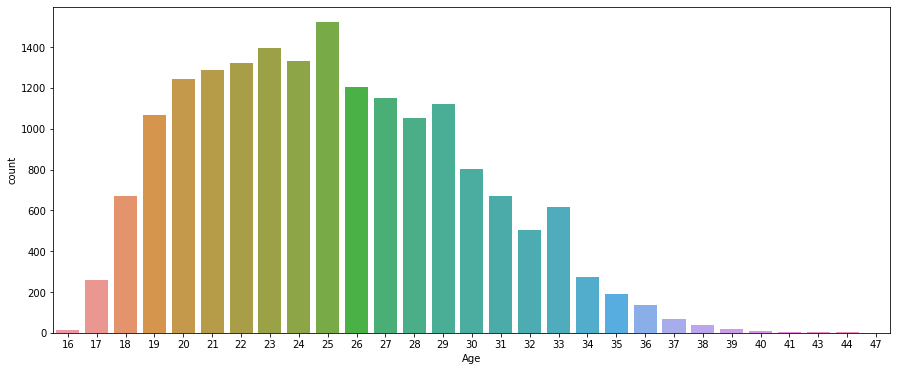

In [10]:
plt.figure(figsize= (15,6))
sns.countplot(x= "Age", data= df2)

Best Goal Keeper:

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 71 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 17981 non-null  object 
 1   Age                  17981 non-null  int64  
 2   Nationality          17981 non-null  object 
 3   Overall              17981 non-null  int64  
 4   Potential            17981 non-null  int64  
 5   Club                 17733 non-null  object 
 6   Value                17981 non-null  object 
 7   Wage                 17981 non-null  object 
 8   Special              17981 non-null  int64  
 9   Acceleration         17981 non-null  object 
 10  Aggression           17981 non-null  object 
 11  Agility              17981 non-null  object 
 12  Balance              17981 non-null  object 
 13  Ball control         17981 non-null  object 
 14  Composure            17981 non-null  object 
 15  Crossing             17981 non-null 

In [39]:
#data for specific positions can be known from columns
gk_handle = df2['GK handling']
gk_handle.head()


        
    

gk_handle = gk_handle.astype('int')
gk_handle.head()

ValueError: invalid literal for int() with base 10: '78-2'

In [ ]:
#goal keeping attributes: GK diving', 'GK handling','GK kicking', 'GK positioning', 'GK reflexes'
#GK kicking can be removed since it does not tell much about GK ability
a,b,c,d = 0.5,1,2,3

#a stopper type keeper will have skill in order>'GK positioning'> 'GK reflexes'> GK handling >, GK diving'
#while a diver keeper will may not be good with positioning and handlingso :  'GK reflexes', GK diving', 'GK positioning'>GK handling >,
print(df2.info())

#so we can create a goalkeeper data base with new attributes:
df2['GK_stopper'] =  (c*df['GK reflexes'] + b*df['GK handling'] + a*df['GK diving'])
df2['GK_sweeper'] = d*df['GK reflexes'] + a*df['GK handling'] + c*df['GK diving']